# Data Canonicalization and Modeling: *Demo Watch*
### Data Science Discovery Program, Fall 2020

Team Members: Joe Cannice, William Furtado, Vyoma Raman, Siyi Wu

*Under the guidance of Nick Adams, PhD, from [Goodly Labs](https://www.goodlylabs.org/)*

## The Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import nltk
from nltk.corpus import stopwords
import string
from os import listdir
from article import Article

In [2]:
STOP_WORDS = set(stopwords.words("english"))

*Data not publicly available*

In [3]:
path_to_data = "../../data/0-2017-snapshot/stage5b/DocumentsParsed-2017-Unzipped"

In [4]:
city_paths = listdir(path_to_data)
article_paths = []
for c in city_paths:
    try:
        article_paths += [path_to_data + "/" + c + "/" + a for a in listdir(path_to_data + "/" + c)]
    except NotADirectoryError as e:
        pass

In [5]:
articles = [Article(p) for p in article_paths if ".DS_Store" not in p]

In [6]:
a = articles[0]
print(a)

Article "20000Albany_NY-TimesUnion-999" was published by TimesUnion on Sunday, November 13, 2011 in Albany_NY and reports on events from Saturday, November 12, 2011.


## Instance Attributes

In [7]:
a.id

'20000Albany_NY-TimesUnion-999'

In [8]:
a.article_date

'2011-11-13'

In [9]:
a.event_date

'2011-11-12'

In [10]:
a.city

'Albany_NY'

In [11]:
a.periodical

'TimesUnion'

In [12]:
print(a.text)

24 arrested at Occupy Albany
Demonstrators taken away after curfew by state troopers at Occupy Albany site
By DAYELIN ROMAN and JENNIFER GISH, Staff writers
Updated 11:36 am, Sunday, November 13, 2011

ALBANY -- Police arrested 24 Occupy Albany protesters late Saturday after they crossed from city land into state-owned Lafayette Park and stayed past 11 p.m. [state-owned Lafayette Park and stayed past 11 p.m.] 
 Protesters [protesters] chanting "Shame on Cuomo"   stood by on the sidewalk as others were arrested and taken away in  State Police  vans. The arrests were peaceful, though protesters yelled and chanted while the demonstrators were being hauled away by police. Demonstrators were charged with trespass and issued appearance tickets to appear in Albany City Court at a later date. 
 State Police gave several warnings via a megaphone before making the arrests. They told protesters they would be arrested if they did not leave the state-owned land. 
 The second of two vans that had be

In [13]:
tua = a.tuas[0]
print(tua)

This TUA is from Article "20000Albany_NY-TimesUnion-999", starting at character 1789 and ending at character 1869. It is of the type "Legal_Action" and reads,

"The people serving as the legal team at the protest were speaking with police."


## Analysis of TUA Texts

The following utility functions help to quantify the TUAs in a way that can be conveniently compared.

In [14]:
def loadArticle(path):
    """
    Loads an article given its path into a Pandas DataFrame
    """
    return pd.read_json(path + "/annotations.json")

In [15]:
def getTuasFromIndex(df, indexLabel):
    """
    Returns a list of TUAs for the given DataFrame and category label.
    """
    tuasDict = df.loc[indexLabel, "tuas"]
    lst = []
    for key in tuasDict:
        for tua in tuasDict[key]:
            lst.append(tua[2])
    return lst

In [16]:
def numTuaCounts():
    """
    Returns a dictionary containing the number of TUA objects within each general category.
    """
    d = {}
    for article in article_paths:
        try:
            df = loadArticle(article)
            for category in df.index:
                num_tuas = len(getTuasFromIndex(df, category))
                d[category] = d.get(category, 0) + num_tuas
        except:
            pass
        
    return d

In [17]:
def topWordsInTua():
    """
    Returns the top ten words within all articles.
    """
    word_dict = {}
    for article in articles:
        for word in article.text.split():
            word = word.lower().translate(str.maketrans('', '', string.punctuation))
            if word not in STOP_WORDS and word != '':
                word_dict[word] = word_dict.get(word, 0) + 1
    return word_dict

In [18]:
word_dict = topWordsInTua()
tua_dict = numTuaCounts()

In [19]:
categories, values = list(tua_dict.keys()), list(tua_dict.values())
tua_count = pd.DataFrame({"Category": categories, "TUA Count": values}).sort_values(by='TUA Count', ascending=False)

In [20]:
words, word_counts = list(word_dict.keys()), list(word_dict.values())
word_count = pd.DataFrame({"Words": words, "TUA Count": word_counts}).sort_values(by='TUA Count', ascending=False)
top_ten_words = word_count.head(10)

In [21]:
tua_count.head()

,Category,TUA Count
9,Useless,2436
6,Strategy,2109
0,Camp,2013
5,Protester,1911
1,Government,1571


In [22]:
word_count.head()

,Words,TUA Count
120,said,4621
2,occupy,4042
28,city,2985
24,protesters,2761
32,park,2292


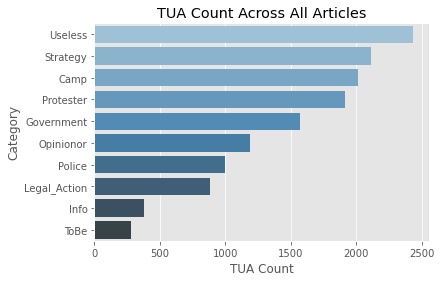

In [23]:
plt.style.use('ggplot')
sns.barplot(x='TUA Count', y='Category', data=tua_count, palette="Blues_d")
plt.title("TUA Count Across All Articles");
plt.savefig("tuaCount.png", bbox_inches='tight', dpi=300)

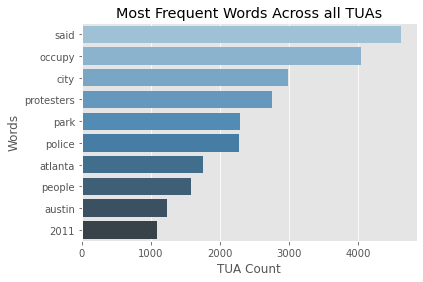

In [24]:
plt.style.use('ggplot')
sns.barplot(x='TUA Count', y='Words', data=top_ten_words, palette='Blues_d')
plt.title("Most Frequent Words Across all TUAs");
plt.savefig("mostFrequentWords.png", bbox_inches='tight', dpi=300);

## Pairwise Matching

The following code groups articles by city and event date to find those that describe the same event.

In [25]:
article_df = pd.DataFrame([[a.id, a.article_date, a.event_date, a.city, a.periodical, a.text] for a in articles], 
                          columns=["Article ID", "Publish Date", "Event Date", "City", "Periodical", "Text"])
article_df.head()

,Article ID,Publish Date,Event Date,City,Periodical,Text
0,20000Albany_NY-TimesUnion-999,2011-11-13,2011-11-12,Albany_NY,TimesUnion,24 arrested at Occupy Albany\nDemonstrators ta...
1,20001Albany_NY-TimesUnion-999,2011-11-14,2011-11-07,Albany_NY,TimesUnion,DA: Protesters won't face charges\nRefusal to ...
2,20002Albany_NY-TimesUnion-999,2011-11-20,2011-11-19,Albany_NY,TimesUnion,Biggest Occupy Albany arrest yet\nPolice poise...
3,20003Albany_NY-TimesUnion-999,2011-10-24,2011-10-21,Albany_NY,TimesUnion,"Under pressure to make arrests, police and tro..."
4,20004Albany_NY-TimesUnion-999,2011-12-23,2011-12-22,Albany_NY,TimesUnion,"Protesters, police tussle as tents fall\nCampe..."


In [26]:
pivot_articles = article_df.pivot_table(values="Article ID", index='Event Date', columns='City', aggfunc='count')
unique_events = pivot_articles.fillna(0).reset_index()#.astype(bool).astype(int)
unique_events.head()

City,Event Date,Albany_NY,Albuquerque,Allentown_City,Anaheim,Anchorage,Arcata_CA,Asheville,Ashtabula_OH,Atlanta,Augusta_ME,Aurora,Austin
0,2011-09-24,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
1,2011-09-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2011-09-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,2011-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,3.0
4,2011-10-01,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0


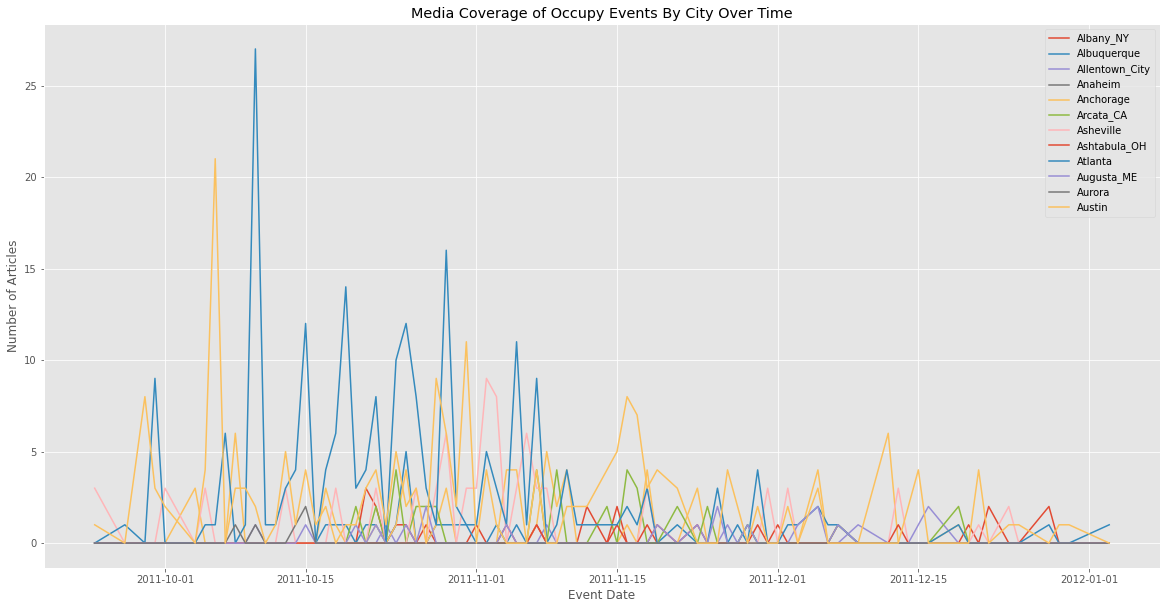

In [27]:
plt.figure(figsize=[20, 10])
plt.plot(pd.to_datetime(unique_events["Event Date"][:-2]), unique_events.iloc[:-2, 1:])
plt.legend(unique_events.iloc[:-2, 1:])
plt.title("Media Coverage of Occupy Events By City Over Time")
plt.ylabel("Number of Articles")
plt.xlabel("Event Date");